In [5]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Parameters

F = len("Nicolas")
L = len("Duc")
N = (F+L)*100

EX1 - Generating data for rest of excercices

In [17]:
model_1 = CmdStanModel(stan_file = 'code_1.stan')
model_2 = CmdStanModel(stan_file = 'code_2.stan')

result_1 = model_1.sample(data = dict(N=N), fixed_param = True)
result_2 = model_2.sample(data = dict(N=N), fixed_param=True)

y1 = result_1.stan_variable('y')
x2 = result_2.stan_variable('X')

data_y1 = dict(N = N, y = y1[0])

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [16]:
print(data_y1)

{'N': 1000, 'y': array([ 4.72505e-01, -3.03443e-01, -1.01654e+00, -1.88905e-01,
       -3.59042e-01, -8.35984e-01, -9.71384e-01,  3.55986e-01,
        8.45812e-01, -1.90899e-01,  1.49266e-01, -1.64765e+00,
        1.16547e+00,  1.91269e+00,  9.53297e-01,  8.72076e-01,
        4.17651e-01, -1.06333e+00, -1.02510e-01,  3.65214e-02,
        1.82973e-01, -1.29631e-01, -1.66888e+00,  1.36325e-01,
       -1.90219e+00, -1.04628e+00,  1.19968e+00,  5.06664e-01,
        6.59411e-02,  1.49453e+00, -1.32489e+00,  1.61828e+00,
        5.32807e-02, -1.12622e+00,  9.14404e-01, -7.95845e-01,
       -2.23859e+00, -6.83244e-01,  6.97875e-02,  4.07714e-01,
        1.87106e-02, -5.06530e-01, -2.02752e+00, -9.66312e-01,
       -1.29766e+00, -2.12184e-01,  7.73970e-01,  1.06593e-01,
       -4.33027e-02,  2.36219e+00,  2.51074e-01, -8.95875e-02,
       -1.89049e+00, -1.29669e+00,  2.09154e-01,  3.08639e-01,
       -6.08366e-02,  8.85453e-01, -1.23960e+00,  5.51019e-01,
       -3.53886e-01,  2.29615e+00,  2.

EX2 - Model comparison

In [28]:
model_3 = CmdStanModel(stan_file = 'code_3.stan')
model_3_simulated = model_3.sample(data=data_y1, seed=21370204)
model_4 = CmdStanModel(stan_file = 'code_4.stan')
model_4_simulated = model_4.sample(data=data_y1, seed=21370204)


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |█████▉    | 00:00 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████████| 00:00 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                       
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status




chain 1 |███▏      | 00:00 Iteration:  500 / 2000 [ 25%]  (Warmup)



chain 1 |██████▎   | 00:00 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |████████▋ | 00:01 Iteration: 1600 / 2000 [ 80%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [24]:
# Comparing 2 models: model_1 - with AGE only, model_2 - with AGE and BMI
idata1 = az.from_cmdstanpy(posterior = model_3_simulated, log_likelihood = "log_lik")
idata2 = az.from_cmdstanpy(posterior = model_4_simulated, log_likelihood = "log_lik") 
compare_dict = {"model_3": idata1, "model_4": idata2}

out_loo = az.compare(compare_dict, ic = "loo")
out_waic = az.compare(compare_dict, ic = "waic") # loo stands for leave one out cross validation

/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:655: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_4,0,-1525.548701,4.460458,0.000000,1.0,35.787799,0.000000,False,log
model_3,1,-1961.388414,49.764000,435.839712,0.0,178.939686,158.409434,True,log


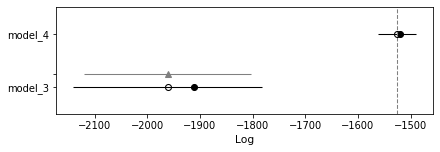

In [25]:
az.plot_compare(out_loo)
out_loo

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_4,0,-1525.543269,4.455025,0.000000,1.0,35.785866,0.000000,True,log
model_3,1,-1962.653851,51.029437,437.110582,0.0,179.982244,159.483497,True,log


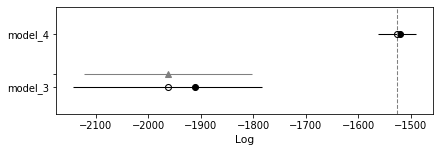

In [26]:
az.plot_compare(out_waic)
out_waic

In [29]:
y1.shape

(1000, 1000)

In [30]:
x2.shape

(1000, 1000, 3)

In [36]:
model_5 = CmdStanModel(stan_file = 'code_5.stan')

num = 5

# One predictor
data_1 = dict(N = N, K = 1, y = y1[num], X = x2[num,:,0:1])
result_1 = model_5.sample(data = data_1, fixed_param = True)

# Two predictor
data_2 = dict(N = N, K = 2, y = y1[num], X = x2[num,:,0:2])
result_2 = model_5.sample(data = data_5_2, fixed_param = True)

# Three predictor
data_3 = dict(N = N, K = 3, y = y1[num], X = x2[num,:,0:3])
result_3 = model_5.sample(data = data_5_3, fixed_param = True)

INFO:cmdstanpy:compiling stan file /home/nicolas/Projects/DataAnalysys-LAB/Lab 7 - Model comparison/code_5.stan to exe file /home/nicolas/Projects/DataAnalysys-LAB/Lab 7 - Model comparison/code_5
INFO:cmdstanpy:compiled model executable: /home/nicolas/Projects/DataAnalysys-LAB/Lab 7 - Model comparison/code_5
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.
INFO:cmdstanpy:CmdStan start processing


chain 1 |██████████| 00:01 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [37]:
# Comparing 2 models: model_1 - with AGE only, model_2 - with AGE and BMI
idata1 = az.from_cmdstanpy(posterior = result_1, log_likelihood = "log_lik")
idata2 = az.from_cmdstanpy(posterior = result_2, log_likelihood = "log_lik") 
idata3 = az.from_cmdstanpy(posterior = result_3, log_likelihood = "log_lik") 

compare_dict = {"1 pred": idata1, "2 pred": idata2 , "3 pred": idata3}

out_loo = az.compare(compare_dict, ic = "loo")
out_waic = az.compare(compare_dict, ic = "waic") # loo stands for leave one out cross validation

/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:655: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/nicolas/anaconda3/envs/cmdstan/lib/python3.8/site-packages/arviz/stats/stats.py:212: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ics = ics.append([ic_func(dataset, pointwise=True, scale=scale)])


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
3 pred,0,-4580.660430,0.0,0.000000,0.121974,493.540390,0.000000,True,log
2 pred,1,-5554.113610,0.0,973.453180,0.206185,671.785084,317.532394,True,log
1 pred,2,-8164.355043,0.0,3583.694613,0.671841,2305.620243,1833.437499,True,log


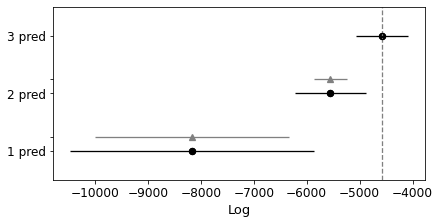

In [39]:
az.plot_compare(out_loo)
out_loo

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
3 pred,0,-4580.660430,4.238963e-23,0.000000,0.121974,493.540390,0.000000,False,log
2 pred,1,-5554.113610,8.581801e-23,973.453180,0.206185,671.785084,317.532394,False,log
1 pred,2,-8164.355043,2.377208e-22,3583.694613,0.671841,2305.620243,1833.437499,False,log


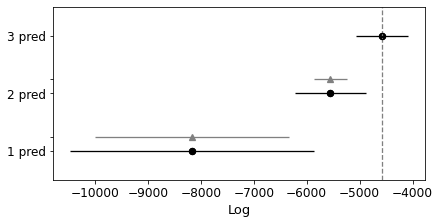

In [38]:
az.plot_compare(out_waic)
out_waic